# Unsupervised Machine Learning: Clustering

#### Table of Contents

    1. Importing libraries
    2. Importing data
    3. Elbow technique
    4. k-means clustering
        4.1 k-means algorithm
        4.2 Visualing clusters
            WRI vs. Exposure
            WRI vs. Susceptibility
            WRI vs. Lack of Coping Capacities
            WRI vs. Lack of Adaptive Capacities
        4.3 Descriptive statistics
        4.4 Next steps
    5. Exporting data

# 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

# 2. Importing data

In [2]:
# Turn project folder path into a string
path = r'/Users/sarahtischer/Desktop/CareerFoundry/Data Immersion/Achievement 6/03-2024_WorldRiskIndex_Analysis'

In [3]:
# Import "WRI_iso_updated.csv"
df = pd.read_csv(os.path.join(path, '02_Data', 'Prepared_data', 'WRI_iso_updated.csv'), index_col = False)

In [4]:
# Confirm the shape of the dataset
df.shape

(1917, 13)

In [5]:
# Check the columns of the dataframe
df.columns

Index(['Country', 'ISO_a3', 'Year', 'WRI', 'Exposure', 'Vulnerability',
       'Susceptibility', 'Lack of Coping Capacities',
       'Lack of Adaptive Capacities', 'WRI Category', 'Exposure Category',
       'Vulnerability Category', 'Susceptibility Category'],
      dtype='object')

In [6]:
# Create a new dataframe with numerical variables only
df_num = df[
    ['WRI', 'Exposure', 'Vulnerability', 
    'Susceptibility', 'Lack of Coping Capacities', 'Lack of Adaptive Capacities']
].copy()

# 3. Elbow technique

In [7]:
# Define range of potential clusters in the data
num_cl = range(1, 10) 

# Define k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [8]:
# Create score representing the rate of variation for the given cluster option
score = [kmeans[i].fit(df_num).score(df_num) for i in range(len(kmeans))]

score

/Users/sarahtischer/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sarahtischer/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sarahtischer/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sarahtischer/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

[-1880146.5353973918,
 -807253.5796011712,
 -518459.3671726957,
 -392798.891961472,
 -331639.03713346896,
 -287872.41964206286,
 -259849.73977278947,
 -237768.66121449182,
 -219200.98778056315]

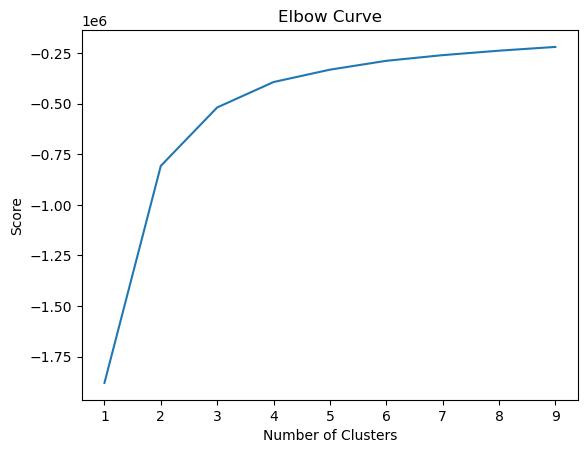

In [9]:
# Plot the elbow curve using PyLab
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### <mark>Interpretation:</mark>

* There is a significant drop from 1 to 2 clusters, followed by a noticeable decrease up to 3. After 3 clusters, the rate of decrease is still noticeable, but becomes less pronounced with each additional cluster.

* Given this information, the choice between 3 and 4 clusters seems reasonable.

* Note: The algorithm has been run for both n_clusters values. Since 3 clusters appeared to display more reasonable results, it was finally used for analysis. 

# 4. k-means clustering

## 4.1 k-means algorithm

In [10]:
# Create the k-means object
kmeans = KMeans(n_clusters=3)

In [11]:
# Fit the k-means object to the data
kmeans.fit(df_num)

/Users/sarahtischer/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [12]:
# Create column containing corresponding clusters
df_num['Clusters'] = kmeans.fit_predict(df_num)

/Users/sarahtischer/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [13]:
# Check a sample
df_num.head()

,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capacities,Lack of Adaptive Capacities,Clusters
0,32.00,56.33,56.81,37.14,79.34,53.96,0
1,29.08,56.04,51.90,28.94,81.80,44.97,0
2,24.32,45.09,53.93,34.99,82.78,44.01,0
3,23.51,36.40,64.60,44.11,85.95,63.74,2
4,20.88,38.42,54.35,35.36,77.83,49.87,0


In [14]:
# Check the frequencies of the "Clusters" columns
df_num['Clusters'].value_counts()

Clusters
0    785
1    572
2    560
Name: count, dtype: int64

## 4.2 Visualizing clusters

#### *Note: Except for Exposure, the below dimensions were chosen for cluster visualization since they didn't show any relationship in previous analyses.*

### WRI vs. Exposure

Text(0, 0.5, 'WRI')

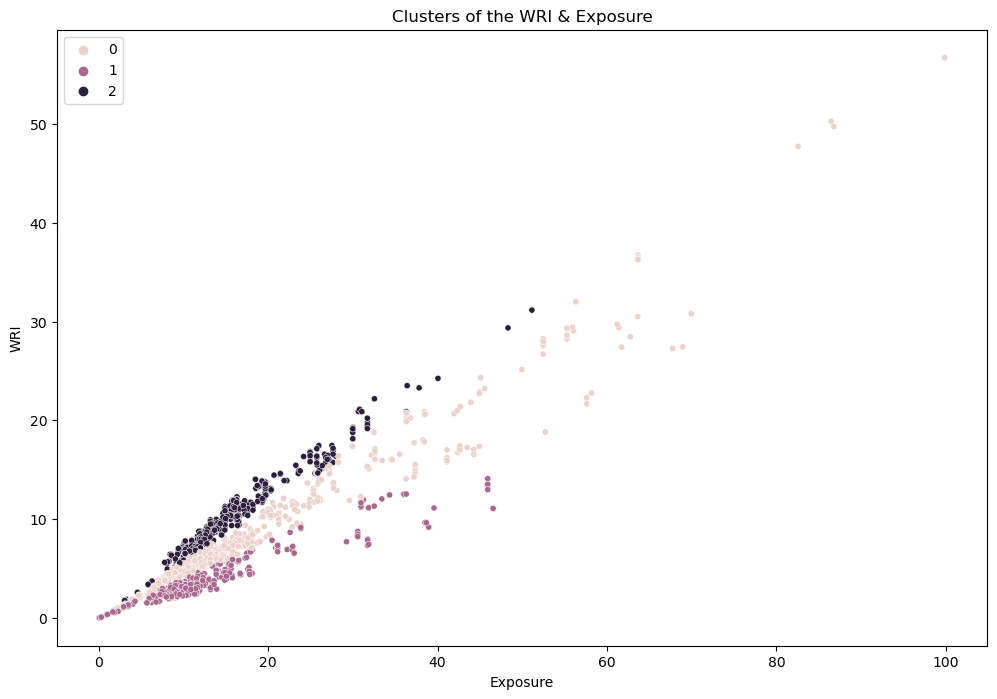

In [15]:
# Plot the clusters for 'WRI' and 'Exposure'
plt.figure(figsize=(12,8))
clusters_wri_exp = sns.scatterplot(x=df_num['Exposure'], y=df_num['WRI'], hue=kmeans.labels_, s=20) 

# Adapt formatting
clusters_wri_exp.grid(False) 
plt.title('Clusters of the WRI & Exposure')
plt.xlabel('Exposure') 
plt.ylabel('WRI') 

In [16]:
# Export scatterplot
clusters_wri_exp.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '5_clusters_wri_exp.png'), bbox_inches='tight')

#### <mark>Interpretation:</mark>

* Values in the dark purple cluster (2) are generally higher and show less variance but a quite strong correlation of Exposure and the WorldRiskIndex. This supports the notion that being exposed to natural hazards is a key determinant of an overall higher risk.
* The overall lowest values can be found in the purple cluster (1), which is also most concentrated on the lowest end of both scales with only a few observations having a medium Exposure. While being less strong than in the dark purple cluster, there is still an obviously positive correlation between Exposure and the WorldRiskIndex. 
* Finally, the light pink cluster contains the most data points and is the most widespread one. In addition, it is  the only cluster with very high values in both dimensions. 
* That there is more variance in the latter two clusters may be an indicator that other dimension become more significant when Exposure is low.

### WRI vs. Susceptibility

Text(0, 0.5, 'WRI')

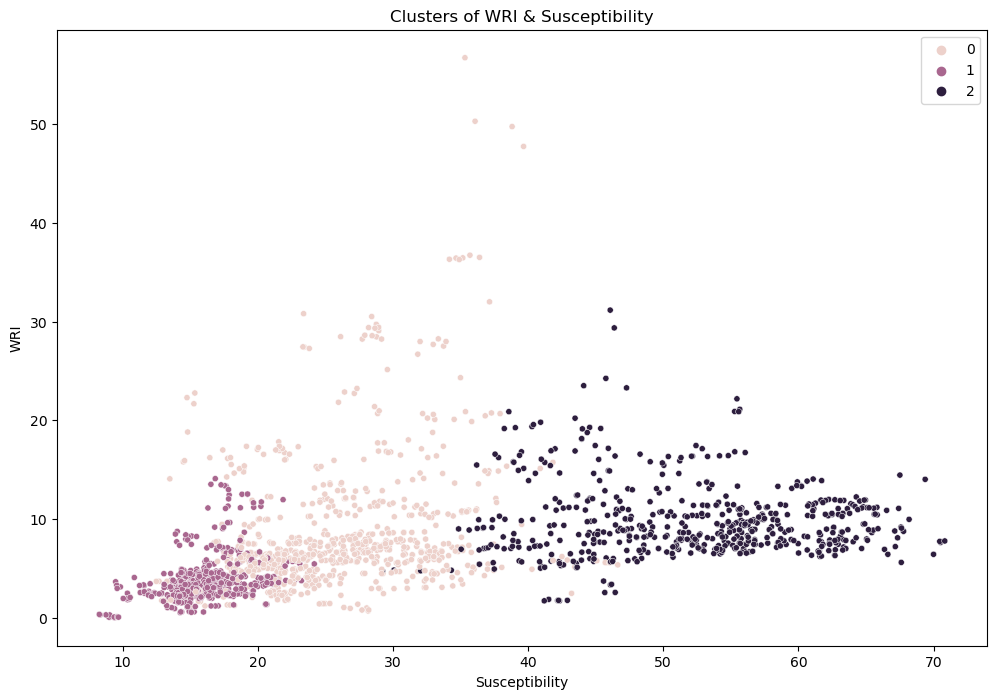

In [17]:
# Plot the clusters for 'WRI' and 'Susceptibility'
plt.figure(figsize=(12,8))
clusters_wri_sus = sns.scatterplot(x=df_num['Susceptibility'], y=df_num['WRI'], hue=kmeans.labels_, s=20) 

# Adapt formatting
clusters_wri_sus.grid(False) 
plt.title('Clusters of WRI & Susceptibility')
plt.xlabel('Susceptibility') 
plt.ylabel('WRI') 

In [18]:
# Export scatterplot
clusters_wri_sus.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '5_clusters_wri_sus.png'), bbox_inches='tight')

#### <mark>Interpretation:</mark>

* The purple cluster (1) is quite concentrated at the lower end of both dimensions, reflecting observations with both low Susceptibility and an overall low WorldRiskIndex. This cluster does not exceed a Susceptibility of 25 and a WorldRiskIndex of 15, indicating that observations with good societal conditions are less at risk from extreme natural events and negative climate change impacts.
* Conversely, the dark purple cluster (2) is the most widespread in terms of Susceptibility. While the overall risk index in this cluster is generally higher than in the first cluster, its Susceptibility scores range from 35 (with very few exceptions slightly lower) to a maximum value of about 70. This suggests that observations with moderate to poor social conditions generally have a higher overall risk of suffering from natural hazards and adverse climate change impacts.
* However, Susceptibility doesn't seem to be a major determinant of overall risk, as shown by the light pink cluster (0). While it contains observations with low Susceptibility and doesn't exceed a score of 50, it still has the widest range of high and even very high WRI scores. In fact, it is the only cluster that exceeds a WRI score of 30.

### WRI vs. Lack of Coping Capacities

Text(0, 0.5, 'WRI')

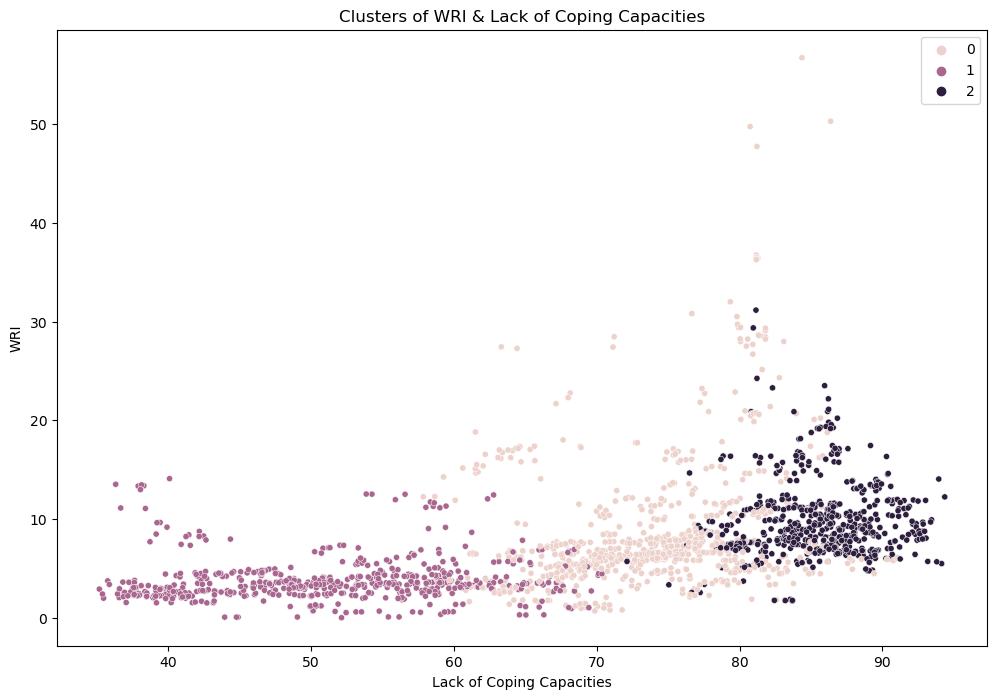

In [19]:
# Plot the clusters for 'WRI' and 'Lack of Coping Capacities'
plt.figure(figsize=(12,8))
clusters_wri_lcc = sns.scatterplot(x=df_num['Lack of Coping Capacities'], y=df_num['WRI'], hue=kmeans.labels_, s=20) 

# Adapt formatting
clusters_wri_lcc.grid(False) 
plt.title('Clusters of WRI & Lack of Coping Capacities')
plt.xlabel('Lack of Coping Capacities') 
plt.ylabel('WRI')

In [20]:
# Export scatterplot
clusters_wri_lcc.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '5_clusters_wri_lcc.png'), bbox_inches='tight')

#### <mark>Interpretation:</mark>

* In contrast to the scatterplot above, the purple cluster (1) has a wide range of Lack of Coping Capacities scores, meaning that up to a Lack of Coping Capacities score of about 60, all observations have a rather low overall risk of suffering from natural hazards and negative climate change impacts.
* Conversely, the dark purple cluster (2) is the most concentrated. Observations in this cluster face an overall higher risk of natural disasters compared to the first cluster, but only if their Lack of Coping Capacities score is above 80, which is very high. However, even the highest Lack of Coping Capacities scores don't necessarily lead to high WorldRiskIndex scores, as shown by the fact that the dark purple cluster does not exceed moderate WRI scores.
* Finally, the light pink cluster (0) shows that only when observations have a medium to high Lack of Coping Capacities, their WRI also tends to spread more towards medium to high values. This implies that even countries with moderate levels of coping capacity can experience significant disaster risk.

### WRI vs. Lack of Adaptive Capacities

Text(0, 0.5, 'WRI')

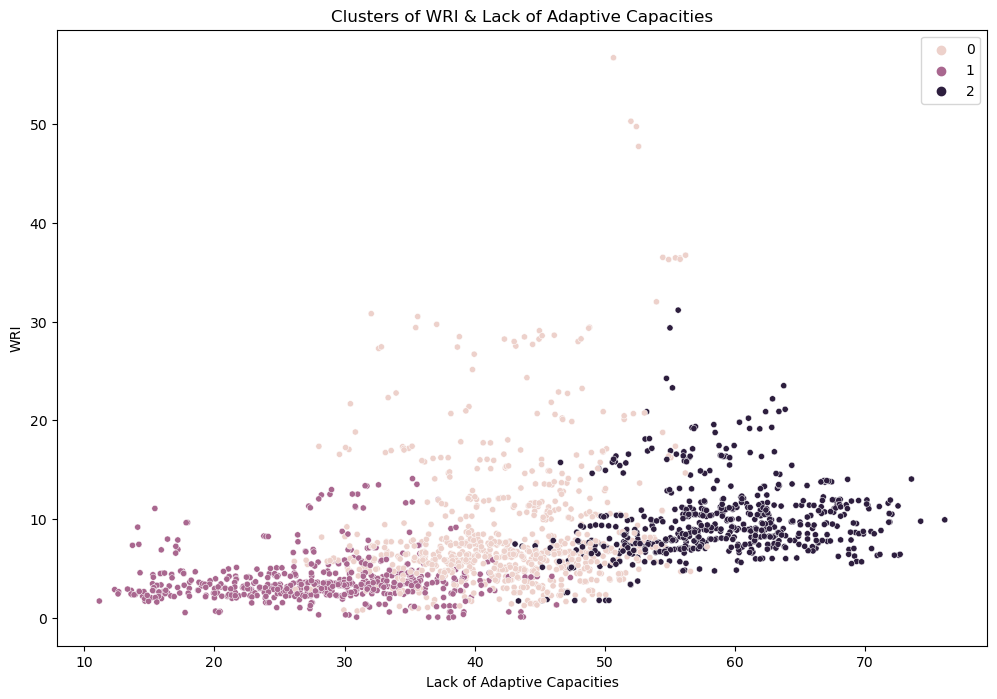

In [21]:
# Plot the clusters for 'WRI' and 'Lack of Adaptive Capacities'
plt.figure(figsize=(12,8))
clusters_wri_lac = sns.scatterplot(x=df_num['Lack of Adaptive Capacities'], y=df_num['WRI'], hue=kmeans.labels_, s=20) 

# Adapt formatting
clusters_wri_lac.grid(False) 
plt.title('Clusters of WRI & Lack of Adaptive Capacities')
plt.xlabel('Lack of Adaptive Capacities') 
plt.ylabel('WRI')

In [22]:
# Export scatterplot
clusters_wri_lac.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '5_clusters_wri_lac.png'), bbox_inches='tight')

#### <mark>Interpretation:</mark>

* The purple cluster (1) reflects that medium to high WRI scores occur only when the Lack of Adaptive Capacities is around 30 or higher, meaning that countries with adaptive capacity have a lower overall risk of suffering from natural hazards and negative climate change impacts.
* Conversely, the dark purple cluster (2) shows that observations with the highest Lack of Adaptive Capacities tend to have a higher overall risk compared to the first cluster. However, it is noteworthy that no observation with an extremely high Lack of Adaptive Capacities also has an extremely high WorldRiskIndex, suggesting that adaptive capacity may not be a key determinant of overall risk. There may also be threshold effects between Lack of Adaptive Capacities and WRI, indicating that beyond a certain level of adaptive capacity, the marginal impact on disaster risk reduction diminishes, especially when other risk factors dominate.
* Finally, the light pink cluster (0) clearly shows that only countries with a moderate Lack of Adaptive Capacities have moderate to very high WRI scores. Not only does this cluster contain the most data points, it is also the only one with (very) high risk indices. This implies that even countries with moderate levels of adaptive capacity can experience significant disaster risk.

## 4.3 Descriptive statistics

In [23]:
df_num.loc[df_num['Clusters'] == 2, 'Color Code'] = 'dark purple'
df_num.loc[df_num['Clusters'] == 1, 'Color Code'] = 'purple'
df_num.loc[df_num['Clusters'] == 0, 'Color Code'] = 'light pink'

In [24]:
# Check a sample
df_num.head()

,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capacities,Lack of Adaptive Capacities,Clusters,Color Code
0,32.00,56.33,56.81,37.14,79.34,53.96,0,light pink
1,29.08,56.04,51.90,28.94,81.80,44.97,0,light pink
2,24.32,45.09,53.93,34.99,82.78,44.01,0,light pink
3,23.51,36.40,64.60,44.11,85.95,63.74,2,dark purple
4,20.88,38.42,54.35,35.36,77.83,49.87,0,light pink


In [25]:
df_num.groupby('Color Code').agg(
    {'WRI':['mean', 'median'],
     'Exposure':['mean', 'median'],
     'Vulnerability':['mean', 'median'],
     'Susceptibility':['mean', 'median'],
     'Lack of Coping Capacities':['mean', 'median'],
     'Lack of Adaptive Capacities':['mean', 'median']}
)

WRI          Exposure         Vulnerability          \
                 mean median       mean  median          mean  median   
Color Code                                                              
dark purple  9.810089   8.99  15.019071  13.520     65.539857  65.785   
light pink   8.655083   6.59  18.026701  14.220     47.504395  47.170   
purple       3.808636   3.39  12.101171  10.765     31.791031  31.995   

            Susceptibility         Lack of Coping Capacities          \
                      mean  median                      mean  median   
Color Code                                                             
dark purple      52.194089  52.865                 85.524589  85.785   
light pink       26.033070  25.530                 73.793465  74.260   
purple           16.137413  15.970                 51.090070  50.960   

            Lack of Adaptive Capacities          
                                   mean  median  
Color Code                                       
dark purple                   58.900875  58.875  
light pink                    42.686764  43.030  
purple                        28.145822  28.880

#### <mark>Interpretation:</mark>

**Purple cluster (1):**
* Represents observations with the lowest levels of risk across all dimensions.
* The lack of extremes in any dimension suggests moderate exposure to natural hazards and societal vulnerability, with moderate coping and adaptive capacities.
* It appears that the lack of adaptive capacities in this cluster is slightly skewed to the left, suggesting that adaptive capacities hasn't been built up due to low exposure.

**Dark purple cluster (2):**
* Exhibits the highest mean and median values across all dimensions except exposure, indicating observations with the highest levels of risk.
* These observations face high exposure to natural hazards, coupled with high societal vulnerability and limited coping and adaptive capacities.
* The distribution of vulnerability is negatively skewed, indicating that some observations within this cluster face extremely poor social conditions compared to others.

**Light pink cluster (0):**
* Despite having the highest exposure, this cluster represents observations with an overall moderate to high level of risk.
* These observations have significant exposure to natural hazards and climate change impacts.
* Susceptibility, lack of coping capacities, and lack of adaptive capacities are also notable in this cluster, suggesting challenges in coping with high exposure.
* The distribution of vulnerability varies, with some observations facing particularly high levels of lack of coping and adaptive capacities.
* However, susceptibility in this cluster is quite moderate and positively skewed, indicating overall good societal conditions.

## 4.4 Next steps

Based on the results of the k-means clustering of the WorldRiskIndex dataset, observations could be grouped into meaningful categories based on the defined clusters. Each cluster represents a distinct category characterized by specific combinations of risk factors, which can provide valuable insights for understanding different levels and types of disaster risk.

**Purple cluster (1):** 
* This cluster represents observations with the lowest level of risk across all dimensions. These observations could be classified as ***"low risk" or "resilient"*** regions/countries, indicating moderate exposure to natural hazards and societal conditions, with moderate coping and adaptive capacities. Examples of countries in this category could include those with robust disaster preparedness plans and strong social safety nets.

**Dark purple cluster (2):** 
* Observations in this cluster have the highest level of risk, with high exposure to natural hazards coupled with high societal vulnerability and limited coping and adaptive capacity. These could be categorized as ***"high risk" or "vulnerable"*** regions/countries, indicating significant challenges in managing and mitigating disaster risk. Examples include countries with weak infrastructure, high poverty rates, and inadequate disaster response capacity.

**Light pink cluster (0):**
* This cluster represents observations with moderate to high levels of risk despite having the highest exposure. These observations could be classified as ***"moderate risk"*** regions/countries, indicating significant exposure to natural hazards and climate change impacts, with challenges in managing and adapting to these risks. Examples include countries with rapid urbanization, environmental degradation, and limited resources for disaster risk management.

In addition, the following steps may be useful for future data analysis:

* **Anomaly detection:** Identify outliers within clusters to understand outliers or extreme risk scenarios. This provides insight into unique cases that may require special attention or investigation.

* **Temporal analysis:** Analyze temporal trends in disaster risk to uncover long-term patterns and evaluate mitigation effectiveness. Apply time series techniques to identify trends, seasonality, and changes in risk levels over time.

# 5. Exporting data

In [26]:
# Confirm the shape of the dataset
df_num.shape

(1917, 8)

In [27]:
# Export df_num as "WRI_clustered.csv"
df_num.to_csv(os.path.join(path, '02_Data', 'Prepared_data', 'WRI_cont_only_clustered.csv'), index = False)